In [23]:
import joblib

metrics_results = joblib.load('data/metrics_results.pkl')
incrx_results = metrics_results['Incx']
d_rise_results = metrics_results['D-RISE']

In [24]:
metrics = list(metrics_results['Incx']['YOLO'].keys())
metrics

['Insertion', 'Deletion', 'EPG', 'Explanation Proportion', 'Time']

In [25]:
import pandas as pd
import numpy as np
from incx.models.model_enum import ModelEnum

def filter_array(array):
    """Filters out zero and NaN values from the array."""
    return array[(array != 0) & ~np.isnan(array)]

results = []

# Iterate over each model and metric using a single loop
for model in ModelEnum:
    for metric in metrics:
        # Process incrx_results
        filtered_values_incrx = filter_array(np.array(incrx_results[model.name][metric]).flatten())
        print(f'Metric {metric}: {len(filtered_values_incrx)}')
        average_value_incrx = np.mean(filtered_values_incrx)
        std_incrx = np.std(filtered_values_incrx)
        results.append({
            'Source': 'incrx_results',
            'Model': model.name + ' incrx',
            'Metric': metric,
            'Average': average_value_incrx,
            'STD': std_incrx
        })
        
        # Process d_rise_results
        filtered_values_d_rise = filter_array(np.array(d_rise_results[model.name][metric]).flatten())
        average_value_d_rise = np.mean(filtered_values_d_rise)
        std_d_rise = np.std(filtered_values_d_rise)
        results.append({
            'Source': 'd_rise_results',
            'Model': model.name + ' d_rise',
            'Metric': metric,
            'Average': average_value_d_rise,
            'STD': std_d_rise
        })

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Pivot the DataFrame to have models as rows and metrics as columns for Average, SEM, and STD
pivot_df_avg = df.pivot_table(index='Model', columns=['Metric'], values='Average')[["Insertion", "Deletion", "EPG", "Explanation Proportion", "Time"]]
pivot_df_std = df.pivot_table(index='Model', columns=['Metric'], values='STD')[["Insertion", "Deletion", "EPG", "Explanation Proportion", "Time"]]


Metric Insertion: 1151
Metric Deletion: 1151
Metric EPG: 1151
Metric Explanation Proportion: 1151
Metric Time: 1151
Metric Insertion: 1797
Metric Deletion: 1797
Metric EPG: 1768
Metric Explanation Proportion: 1707
Metric Time: 1797
Metric Insertion: 2037
Metric Deletion: 2037
Metric EPG: 2037
Metric Explanation Proportion: 2026
Metric Time: 2037


In [26]:
print("Pivot Table of Averages:")
pivot_df_avg

Pivot Table of Averages:


Metric,Insertion,Deletion,EPG,Explanation Proportion,Time
Model,,,,,
FASTER_RCNN d_rise,1.555489,0.015854,0.241445,0.061673,47.872453
FASTER_RCNN incrx,1.526866,0.026111,0.269333,0.053614,4.055507
RT_DETR d_rise,0.910831,0.034647,0.244905,0.224557,57.194337
RT_DETR incrx,0.889239,0.040508,0.255598,0.044455,1.238629
YOLO d_rise,0.722229,0.021302,0.273750,0.333746,28.207999
YOLO incrx,0.729404,0.028130,0.261522,0.251970,0.651091


In [27]:
print("Pivot Table of Standard deviations:")
pivot_df_std

Pivot Table of Standard deviations:


Metric,Insertion,Deletion,EPG,Explanation Proportion,Time
Model,,,,,
FASTER_RCNN d_rise,18.586758,0.030164,0.147523,0.126650,213.748341
FASTER_RCNN incrx,18.327508,0.114209,0.167635,0.073992,157.638511
RT_DETR d_rise,0.670731,0.039904,0.108097,0.327737,81.729137
RT_DETR incrx,0.693397,0.049810,0.111907,0.059791,24.665810
YOLO d_rise,0.681263,0.053318,0.165608,0.363355,32.917138
YOLO incrx,0.470726,0.091722,0.164325,0.283887,9.666681


In [28]:
import pandas as pd
import numpy as np
from scipy import stats
from incx.models.model_enum import ModelEnum

def filter_array(array):
    return array[(array != 0) & ~np.isnan(array)]

results = []

for model in ModelEnum:
    for metric in metrics:

        values_incrx = filter_array(np.array(incrx_results[model.name][metric]).flatten())
        
        values_d_rise = filter_array(np.array(d_rise_results[model.name][metric]).flatten())

        _, p_value = stats.ttest_ind(values_incrx, values_d_rise)

        results.append({
            'Model': model.name,
            'Metric': metric,
            'P-value': p_value
        })

df_t_test = pd.DataFrame(results)

print()
df_t_test.pivot_table(index='Model', columns=['Metric'], values='P-value')[["Insertion", "Deletion", "EPG", "Explanation Proportion", "Time"]]

Metric,Insertion,Deletion,EPG,Explanation Proportion,Time
Model,,,,,
FASTER_RCNN,0.960541,0.000091,1.866283e-08,1.340361e-02,1.183529e-13
RT_DETR,0.342936,0.000101,3.888070e-03,1.601195e-103,5.311417e-154
YOLO,0.768922,0.029190,7.564582e-02,2.097619e-09,7.673822e-142


C:\Users\santiago.calderon\AppData\Local\Temp\ipykernel_20476\3844947286.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2)


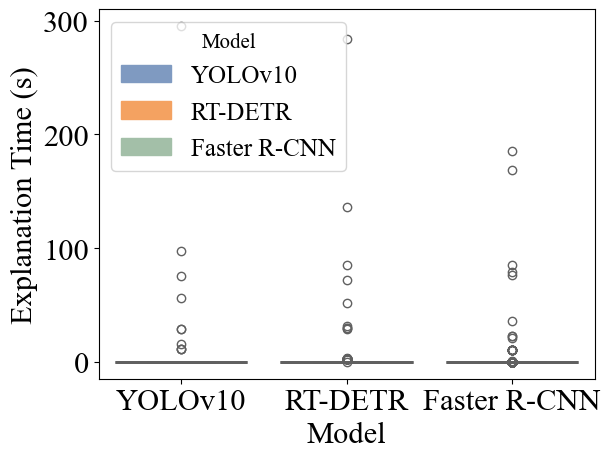

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def filter_array_2(array):
    return array[array <= 800]

yolo = filter_array_2(filter_array(np.array(incrx_results['YOLO']['Time']).flatten()))
rtdetr = filter_array_2(filter_array(np.array(incrx_results['RT_DETR']['Time']).flatten()))
fasterrcnn = filter_array_2(filter_array(np.array(incrx_results['FASTER_RCNN']['Time']).flatten()))

# Create a DataFrame for each list with a category label
data_yolo = pd.DataFrame({'value': yolo, 'category': 'YOLOv10'})
data_rtdetr = pd.DataFrame({'value': rtdetr, 'category': 'RT-DETR'})
data_fasterrcnn = pd.DataFrame({'value': fasterrcnn, 'category': 'Faster R-CNN'})

# Combine the DataFrames
data = pd.concat([data_yolo, data_rtdetr, data_fasterrcnn])

# Configure matplotlib to use Times New Roman font
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': False  # Disable LaTeX rendering
})

# Create the figure and axes
fig, ax = plt.subplots()

# Create boxplots with slightly more saturated yet soft colors and thicker lines
sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2)

# Customize the plot with increased font sizes
ax.set_xlabel('Model', fontsize=22)
ax.set_ylabel('Explanation Time (s)', fontsize=22)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=22)

# Add a legend with increased font size
handles = [
    mpatches.Patch(color='#7F9AC1', label='YOLOv10'),
    mpatches.Patch(color='#F4A261', label='RT-DETR'),
    mpatches.Patch(color='#A3BFA8', label='Faster R-CNN')
]
ax.legend(handles=handles, title='Model', loc='best', fontsize=18, title_fontsize='15')

# Show the plot
plt.savefig("blob/incrx_boxplot.pdf", format="pdf", bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()

C:\Users\santiago.calderon\AppData\Local\Temp\ipykernel_20476\2755336468.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2)


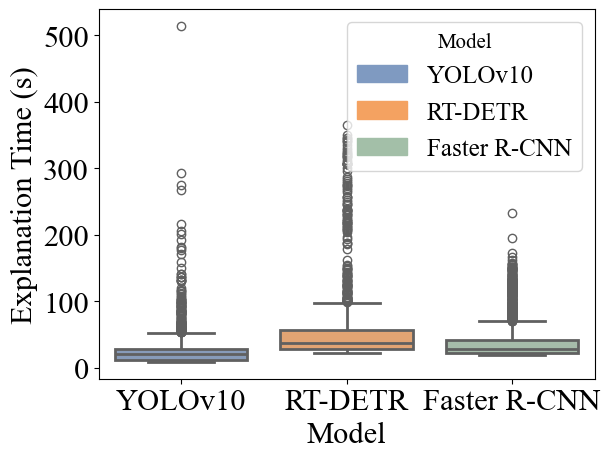

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


yolo = filter_array_2(filter_array(np.array(d_rise_results['YOLO']['Time']).flatten()))
rtdetr = filter_array_2(filter_array(np.array(d_rise_results['RT_DETR']['Time']).flatten()))
fasterrcnn = filter_array_2(filter_array(np.array(d_rise_results['FASTER_RCNN']['Time']).flatten()))

# Create a DataFrame for each list with a category label
data_yolo = pd.DataFrame({'value': yolo, 'category': 'YOLOv10'})
data_rtdetr = pd.DataFrame({'value': rtdetr, 'category': 'RT-DETR'})
data_fasterrcnn = pd.DataFrame({'value': fasterrcnn, 'category': 'Faster R-CNN'})

# Combine the DataFrames
data = pd.concat([data_yolo, data_rtdetr, data_fasterrcnn])

# Configure matplotlib to use Times New Roman font
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': False  # Disable LaTeX rendering
})

# Create the figure and axes
fig, ax = plt.subplots()

# Create boxplots with slightly more saturated yet soft colors and thicker lines
sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2)

# Customize the plot with increased font sizes
ax.set_xlabel('Model', fontsize=22)
ax.set_ylabel('Explanation Time (s)', fontsize=22)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=22)

# Add a legend with increased font size
handles = [
    mpatches.Patch(color='#7F9AC1', label='YOLOv10'),
    mpatches.Patch(color='#F4A261', label='RT-DETR'),
    mpatches.Patch(color='#A3BFA8', label='Faster R-CNN')
]
ax.legend(handles=handles, title='Model', loc='best', fontsize=18, title_fontsize='15')

# Show the plot
plt.savefig("blob/drise_boxplot.pdf", format="pdf", bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()

In [31]:
import joblib
from incx.models.model_enum import ModelEnum
import numpy as np
import pandas as pd

# Load the comparison results from a pickle file
with open('data/comparison_results.pkl', 'rb') as f:
    comparison_results = joblib.load(f)

def filter_zeroes(array):
    return array[array != 0]

data = []

for model in ModelEnum:
    pearson_filtered = filter_zeroes(comparison_results[model.name]['Pearson'])
    structural_filtered = filter_zeroes(comparison_results[model.name]['Structural'])
    dice_filtered = filter_zeroes(comparison_results[model.name]['Dice'])
    jaccard_filtered = filter_zeroes(comparison_results[model.name]['Jaccard'])
    
    pearson_mean = np.mean(pearson_filtered)
    structural_mean = np.mean(structural_filtered)
    dice_mean = np.mean(dice_filtered)
    jaccard_mean = np.mean(jaccard_filtered)
    
    pearson_std = np.std(pearson_filtered)
    structural_std = np.std(structural_filtered)
    dice_std = np.std(dice_filtered)
    jaccard_std = np.std(jaccard_filtered)
    
    data.append({
        'Model': model.name,
        'Correlation Coefficient Mean': pearson_mean,
        'Correlation Coefficient Std': pearson_std,
        'Structural Mean': structural_mean,
        'Structural Std': structural_std,
        'Jaccard Mean': jaccard_mean,
        'Jaccard Std': jaccard_std,
        'Dice Mean': dice_mean,
        'Dice Std': dice_std
    })

# Create a DataFrame with the results and set 'Model' as the index
df = pd.DataFrame(data)
df.set_index('Model', inplace=True)
df

,Correlation Coefficient Mean,Correlation Coefficient Std,Structural Mean,Structural Std,Jaccard Mean,Jaccard Std,Dice Mean,Dice Std
Model,,,,,,,,
YOLO,0.792559,0.126021,0.655629,0.164322,0.451075,0.232133,0.585014,0.232712
RT_DETR,0.852155,0.092318,0.697020,0.119940,0.250154,0.233710,0.348623,0.278801
FASTER_RCNN,0.844210,0.105981,0.665927,0.179621,0.363338,0.223718,0.490612,0.261323
